In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
data=np.loadtxt("A2Q3.csv",delimiter=',',dtype='float')
# taking the input

In [3]:
def gaussian(X,mu,sigma):
    inv = np.linalg.pinv(sigma)
    det = np.linalg.det(sigma)
    const=0
    if det <=0 : 
        const = 0
    else:
        const = 1.0 / (np.sqrt((2 * np.pi)** X.shape[1] * det)) 
    exponent = -0.5 * np.sum(np.dot((X-mu),inv) * (X - mu), axis = 1)
    return const * np.exp(exponent)
# finding and returning the gaussian

In [4]:
def compute_log_likelihood(X,K,mu,sigma,alpha):
    # Computing the log_likelihoods 
    likelihoods=np.zeros((X.shape[0],K))

    for i in range(K):
        mvn=gaussian(X,mu[i],sigma[i])
        likelihoods[:,i]=alpha[i] * mvn
        # computing the likelihood functions
        
    return np.log(likelihoods.sum(axis = 1)).sum()

In [5]:
def compute_silhouette_score(X,cluster_assignments):
    num_clusters = len(np.unique(cluster_assignments))
    if num_clusters < 2:
        return 0
    else:
        return silhouette_score(X, cluster_assignments)
    # computing silhouette_score with the help of scikit

In [6]:
def compute_bic(X,K,log_likelihood):
    num_of_samples=X.shape[0]
    num_of_features=X.shape[1]
    num_of_parameters=K*(num_of_features + num_of_features*(num_of_features+1)/2+1)
    bic = -2*log_likelihood + num_of_parameters * np.log(num_of_samples)
    return bic
# computing bic score

In [12]:
def EM(X,K,num_of_iter,var):
    num_of_samples=X.shape[0]
    num_of_features=X.shape[1]
    
    mu=X[np.random.choice(num_of_samples,K,replace=False)]
    sigma=np.zeros((K,num_of_features,num_of_features))
    alpha=np.full(K,1/K)
    # Initializing the model parameters 
    
    log_likelihoods = []
    temp = -np.inf
    
    for i in range(K):
        sigma[i]=np.eye(num_of_features)
    
    for i in range(num_of_iter):
        ## E-Step
        likelihoods = np.zeros((num_of_samples,K))
        for j in range(K):
            mvn=gaussian(X,mu[j],sigma[j])
            likelihoods[:,j]= alpha[j] * mvn
        responsibilities= likelihoods / likelihoods.sum(axis=1, keepdims=True)
        # finding the responsibilities
        
        ## M-step
        alpha=responsibilities.mean(axis=0)
        for j in range(K):
            x_mu=X[:,np.newaxis,:] - mu
            x_mu_res = x_mu * responsibilities[:,:,np.newaxis]
            sigma[j] = np.dot(x_mu_res[:,j,:].T,x_mu_res[:,j,:]) / responsibilities[:,j].sum()
        for j in range(K):
            mu[j]=(X * responsibilities[:, j, np.newaxis]).sum(axis=0) / responsibilities[:,j].sum()
            #updating the model parameters 
        
        # Compute log-likelihood
        log_likelihood=compute_log_likelihood(X,K,mu,sigma,alpha)
        if(abs(log_likelihood - temp) <= var):
            break
        else:
            temp = log_likelihood
        log_likelihoods.append(log_likelihood)
        

    # Create the scatter plot
    cmap = plt.cm.get_cmap('viridis',K)
    cluster_assignments = np.argmax(responsibilities, axis=1)
    for i in range(K):
        plt.scatter(X[cluster_assignments == i, 0], X[cluster_assignments == i, 1],color=cmap(i))
    plt.scatter(mu[:, 0],mu[:,1], marker='*', s=300, linewidth= 1, color='red')
    #plotting the scatter plot
    
    legend_elements = [plt.Line2D([0],[0],marker='o', color='w',label='Cluster {}'.format(k+1),markerfacecolor=cmap(k),markersize=10) for k in range(K)]
    plt.legend(handles=legend_elements,loc='upper right')
    # Adding title and legends

    plt.title(f"GMM Scatter Plot for K = {K}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
    
    # Plotting the log-likelihood curve
    plt.plot(range(len(log_likelihoods)),log_likelihoods)
    plt.title('Log-likelihood Curve')
    plt.xlabel('Iteration')
    plt.ylabel('Log-likelihood')
    plt.show()
    
    return cluster_assignments,log_likelihood

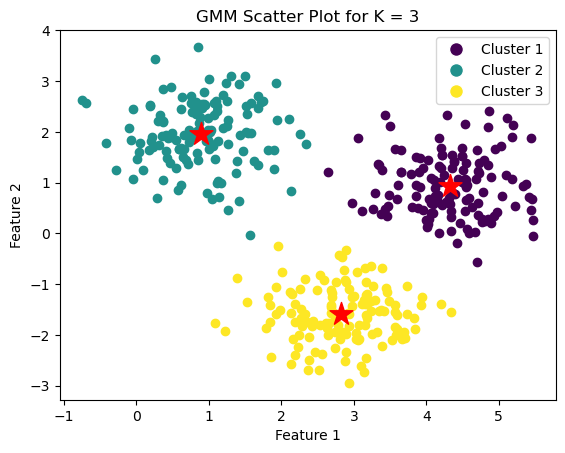

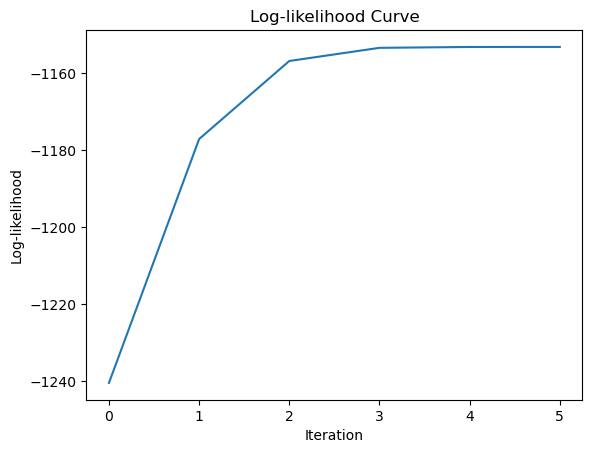

In [20]:
clster,likelihood=EM(data,3,100,0.001)

# PART B

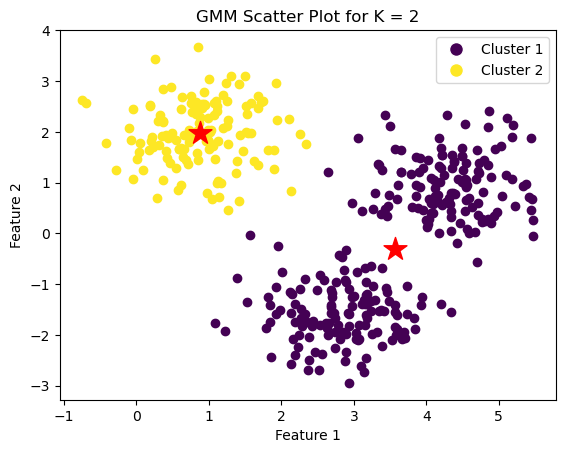

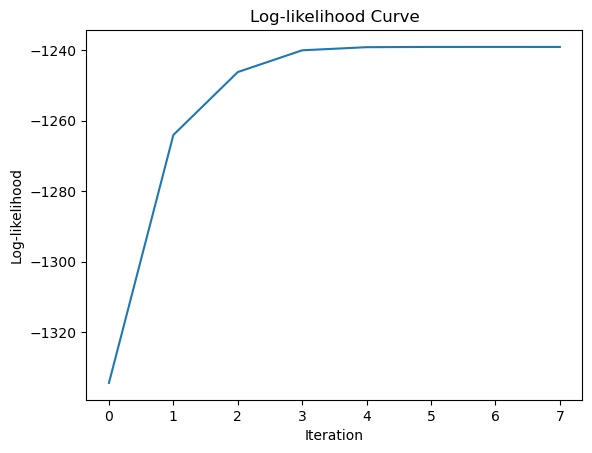

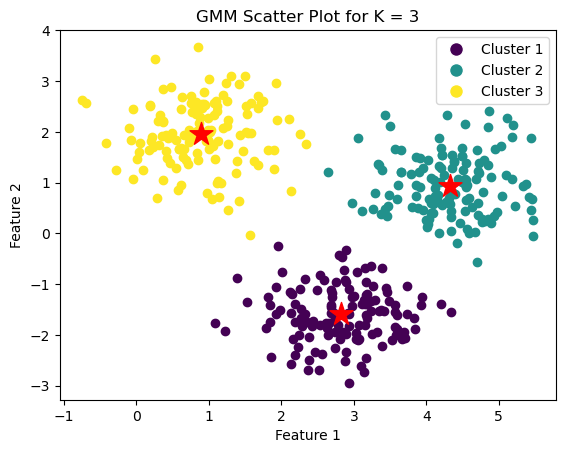

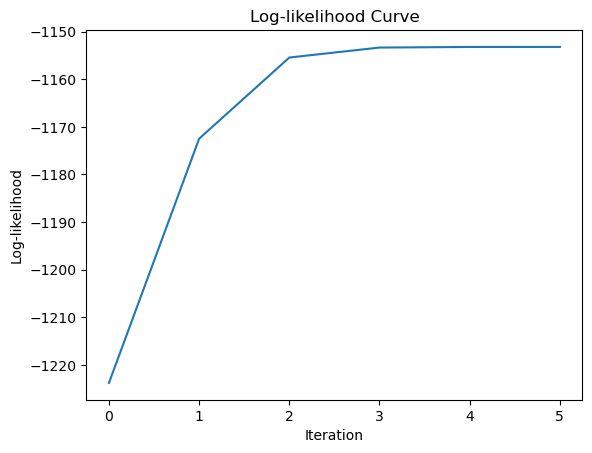

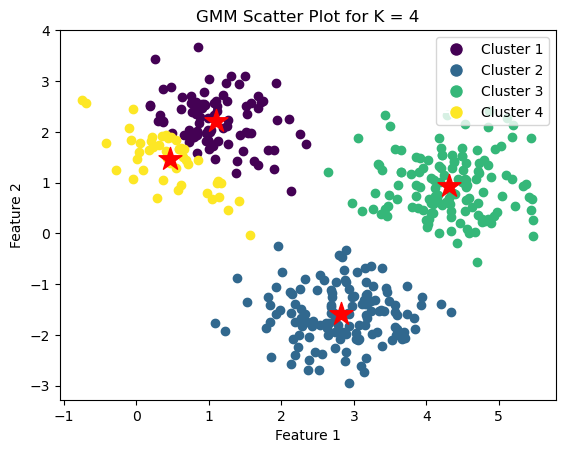

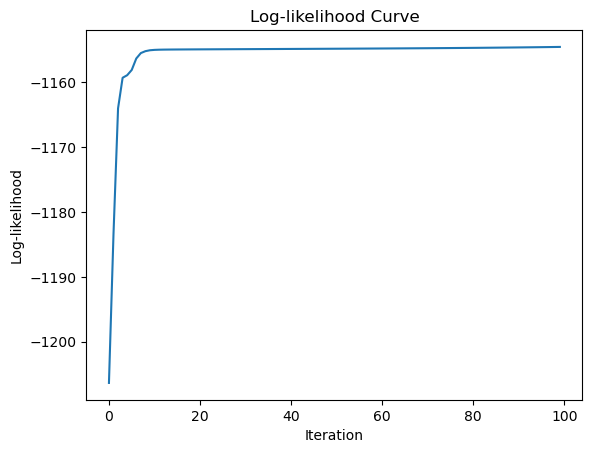

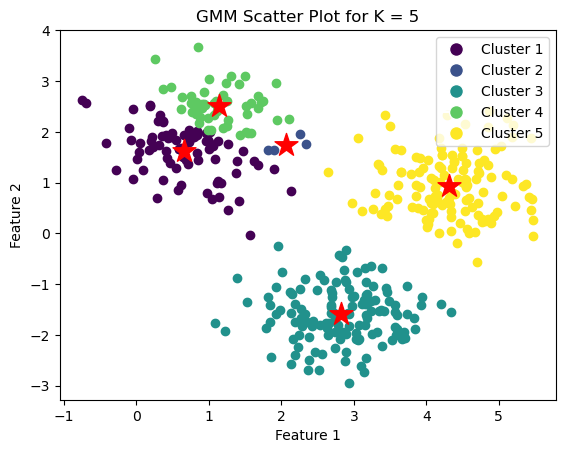

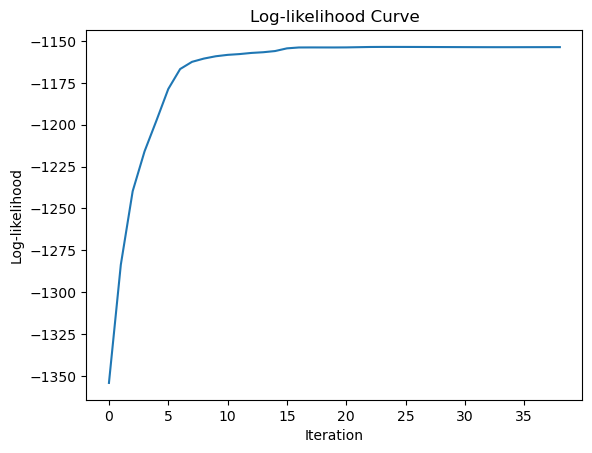

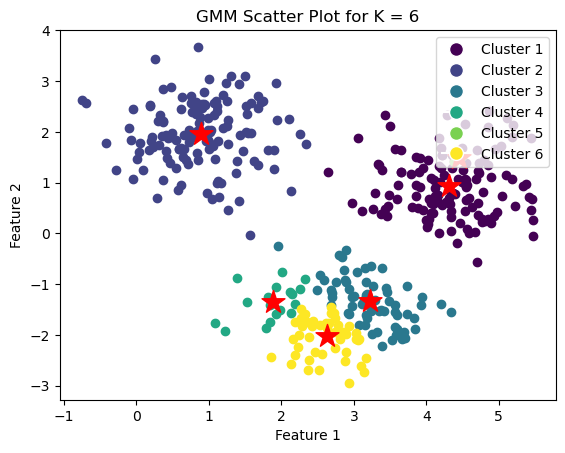

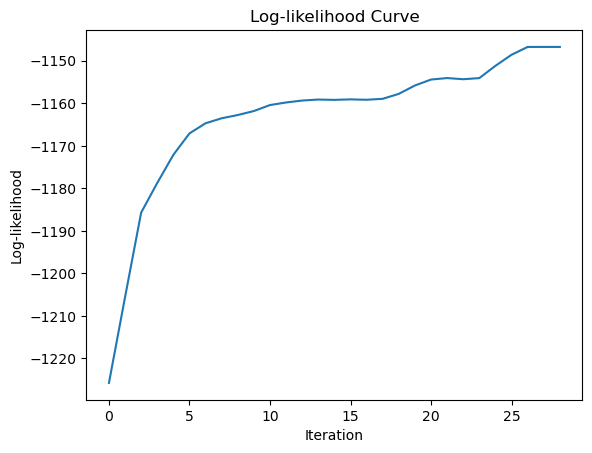

In [14]:
arr=[2,3,4,5,6]
# Values of number of clusters
vec1=[]
# silhouette score
vec2=[]
# bic

for i in arr:
    plt.title('Cluster Assignments '+ str(i))
    cluster_assignments,log_likelihood = EM(data,i,100,0.001)
    sil_score = compute_silhouette_score(data,cluster_assignments)
    bic = compute_bic(data,i,log_likelihood)
    vec1.append(sil_score)
    vec2.append(bic)
    # computing the silhouette and bic scores for the given k values

# PART C

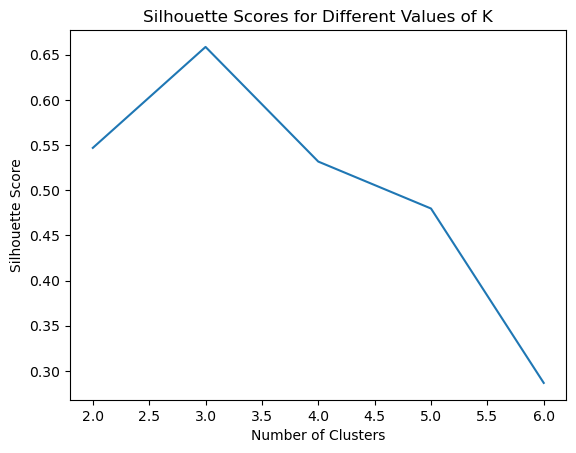

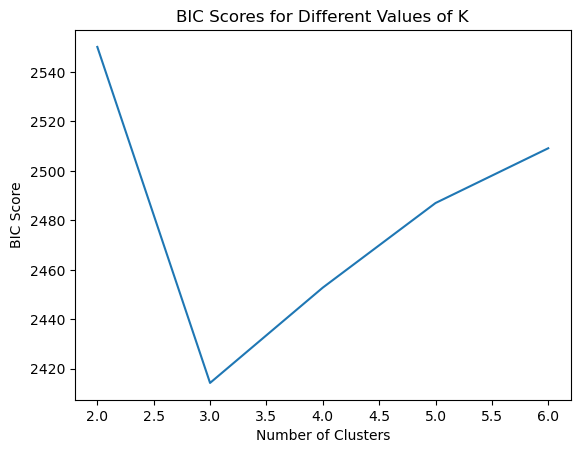

According to the graphs Silhouette Score's peak is at K=3 and bic scores low is at K=3
So, The optimal K-value is 3


In [22]:
# Plotting the Silhouette and BIC scores
plt.plot(arr,vec1)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Values of K')
plt.show()

plt.plot(arr, vec2)
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.title("BIC Scores for Different Values of K")
plt.show()

print("According to the graphs Silhouette Score's peak is at K=3 and bic scores low is at K=3")
print(f"So, The optimal K-value is {3}")
